Імпортуємо потрібну бібліотеку.

In [1]:
import pandas as pd 

In [2]:
def getDataset(path):
    return pd.read_csv(path, sep=',',encoding='cp1252')

dataset = getDataset('FullDataset.csv')

dataset = dataset[dataset["ID"]<50000]
dataset.info()
dataset.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50073 entries, 0 to 50072
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50073 non-null  int64  
 1   ID          50073 non-null  int64  
 2   Sex         50073 non-null  object 
 3   Age         50073 non-null  int64  
 4   Height      50073 non-null  int64  
 5   Weight      50073 non-null  int64  
 6   Team        50073 non-null  object 
 7   Year        50073 non-null  int64  
 8   Season      50073 non-null  object 
 9   Sport       50073 non-null  object 
 10  Medal       6658 non-null   object 
 11  Code        50073 non-null  object 
 12  GDP         50073 non-null  float64
 13  Population  50073 non-null  float64
dtypes: float64(2), int64(6), object(6)
memory usage: 5.7+ MB


,Unnamed: 0,ID,Sex,Age,Height,Weight,Team,Year,Season,Sport,Medal,Code,GDP,Population
0,0,1,M,24,180,80,China,1992,Summer,Basketball,NaN,CHN,4.269157e+11,1.164970e+09
1,1,2,M,23,170,60,China,2012,Summer,Judo,NaN,CHN,8.532230e+12,1.350695e+09
2,2,5,F,21,185,82,Netherlands,1988,Winter,Speed Skating,NaN,NLD,2.619105e+11,1.476009e+07
3,3,5,F,21,185,82,Netherlands,1988,Winter,Speed Skating,NaN,NLD,2.619105e+11,1.476009e+07
4,4,5,F,25,185,82,Netherlands,1992,Winter,Speed Skating,NaN,NLD,3.629629e+11,1.518417e+07
5,5,5,F,25,185,82,Netherlands,1992,Winter,Speed Skating,NaN,NLD,3.629629e+11,1.518417e+07
6,6,5,F,27,185,82,Netherlands,1994,Winter,Speed Skating,NaN,NLD,3.791303e+11,1.538284e+07
7,7,5,F,27,185,82,Netherlands,1994,Winter,Speed Skating,NaN,NLD,3.791303e+11,1.538284e+07
8,8,6,M,31,188,75,United States,1992,Winter,Cross Country Skiing,NaN,USA,6.520327e+12,2.565140e+08
9,9,6,M,31,188,75,United States,1992,Winter,Cross Country Skiing,NaN,USA,6.520327e+12,2.565140e+08


Приберемо непотрібні для нашого аналізу стовпчики.

In [3]:
dataset = dataset.drop("Unnamed: 0", axis = 1)
dataset = dataset.drop("Code", axis = 1)
dataset = dataset.drop("Year", axis = 1)
dataset = dataset.drop("Team", axis = 1)
dataset = dataset.drop("Population", axis = 1)
dataset = dataset.drop("ID", axis = 1)
dataset = dataset.drop("Sport", axis = 1)
dataset.info()
dataset.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50073 entries, 0 to 50072
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     50073 non-null  object 
 1   Age     50073 non-null  int64  
 2   Height  50073 non-null  int64  
 3   Weight  50073 non-null  int64  
 4   Season  50073 non-null  object 
 5   Medal   6658 non-null   object 
 6   GDP     50073 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 3.1+ MB


,Sex,Age,Height,Weight,Season,Medal,GDP
0,M,24,180,80,Summer,NaN,4.269157e+11
1,M,23,170,60,Summer,NaN,8.532230e+12
2,F,21,185,82,Winter,NaN,2.619105e+11
3,F,21,185,82,Winter,NaN,2.619105e+11
4,F,25,185,82,Winter,NaN,3.629629e+11
5,F,25,185,82,Winter,NaN,3.629629e+11
6,F,27,185,82,Winter,NaN,3.791303e+11
7,F,27,185,82,Winter,NaN,3.791303e+11
8,M,31,188,75,Winter,NaN,6.520327e+12
9,M,31,188,75,Winter,NaN,6.520327e+12


Змінимо значення поля з медалями як булеве чи здобув спортсмен медаль.

In [4]:
dataset["Medal"].notnull().astype('int')
dataset["Medal"].fillna(0,inplace = True)
dataset["Medal"].fillna(0,inplace = True)

dataset["Medal"]=dataset["Medal"].replace(regex=["Gold"],value='1')
dataset["Medal"]=dataset["Medal"].replace(regex=["Bronze"],value='1')
dataset["Medal"]=dataset["Medal"].replace(regex=["Silver"],value='1')
dataset.to_csv("check1.csv", sep=',', encoding='utf-8')



Ми готові працювати з даними. Тепер давайте розподілимо дані на тренувальні та дані для тесту.

In [5]:
from sklearn.model_selection import train_test_split
trainingData, testingData  = train_test_split(dataset,test_size=0.2,random_state = 1)

features = pd.concat([trainingData,testingData]).reset_index(drop = True)
features = pd.get_dummies(features)
features = features.drop("Medal_0", axis = 1)
features.rename(columns = {'Medal_1':'Medal'}, inplace = True)
trainingData = features.iloc[:trainingData.shape[0],:]
testingData = features.iloc[trainingData.shape[0]:,:]
print(trainingData.head(10))


   Age  Height  Weight           GDP  Sex_F  Sex_M  Season_Summer  \
0   25     186      82  1.889435e+11      0      1              1   
1   25     180      75  2.791167e+11      0      1              1   
2   24     190      95  1.935936e+11      0      1              1   
3   27     160      57  1.320162e+12      1      0              0   
4   28     166      56  4.287570e+11      1      0              0   
5   16     166      60  3.131737e+10      1      0              1   
6   29     170      73  1.875797e+12      1      0              1   
7   14     156      44  9.251127e+10      1      0              1   
8   34     176     107  1.832776e+10      1      0              1   
9   38     185      70  5.177061e+11      0      1              1   

   Season_Winter  Medal  
0              0      1  
1              0      0  
2              0      0  
3              1      0  
4              1      0  
5              0      0  
6              0      0  
7              0      0  
8     

Тепер визначимо змінні X та Y для тренувальних та тестувальних даних.

In [6]:
trainingX  = trainingData.drop(columns='Medal')
trainingY = trainingData['Medal']

testingX  = testingData.drop(columns='Medal')
testingY = testingData['Medal']

trainingY.info()

<class 'pandas.core.series.Series'>
RangeIndex: 40058 entries, 0 to 40057
Series name: Medal
Non-Null Count  Dtype
--------------  -----
40058 non-null  uint8
dtypes: uint8(1)
memory usage: 39.2 KB


Додамо необхідні бібліотеки для побудови моделей, побудуємо їх та перевіримо на тестових даних. Спочатку класифікатор Decision Tree.

Cvs in Decision Tree: 0.8668431131856703
Score of Decision Tree: 0.8691962056914628


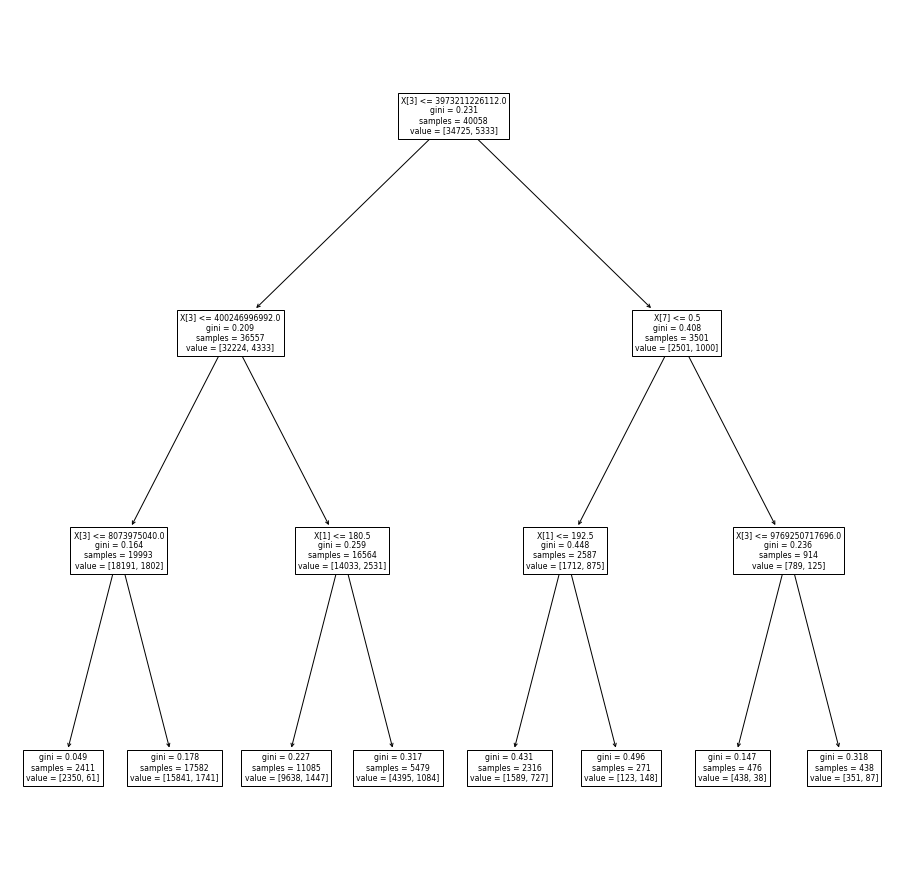

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
decisionTree = DecisionTreeClassifier(max_depth=3,random_state=1)
tree_scores = cross_val_score(decisionTree,trainingX,trainingY,cv = 5)
print('Cvs in Decision Tree:', tree_scores.mean())
decisionTree.fit(trainingX,trainingY)
print('Score of Decision Tree:',decisionTree.score(testingX,testingY)) 

plt.figure(figsize=(16,16))  
tree.plot_tree(decisionTree)
plt.show()
count = 0
arr = decisionTree.predict(testingX)
for i in range(len(arr)):
    print(arr[i])
    if(arr[i] == 1):
        count += 1 
print(count)
print(testingY)

Тепер класифікатор Random Forest. 

In [8]:
# from sklearn.ensemble import RandomForestClassifier
# randomForest = RandomForestClassifier(max_depth=3)
# tree_scores = cross_val_score(randomForest,trainingX,trainingY,cv = 5)
# print('Cvs in Random Forest:', tree_scores.mean())
# randomForest.fit(trainingX,trainingY)
# print('Score of Random Forest:',randomForest.score(testingX,testingY)) 


Тепер класифікатор Gradient Boosting.

In [9]:
# from sklearn.ensemble import GradientBoostingClassifier
# gradientBoosting = GradientBoostingClassifier(learning_rate = 0.1)
# tree_scores = cross_val_score(gradientBoosting,trainingX,trainingY,cv = 5)
# print('Cvs in Gradient Boosting:', tree_scores.mean())
# gradientBoosting.fit(trainingX,trainingY)
# print('Score of Gradient Boosting:',gradientBoosting.score(testingX,testingY)) 